In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## You can use the below kaggle link to access code and Data <br> "https://www.kaggle.com/jasoncobra3/pca-for-predictions-1/edit" we use the Mnist dataset

In [ ]:
df=pd.read_csv("/kaggle/input/digit-recognizer/train.csv")

In [ ]:
df.shape

In [ ]:
df.sample()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.imshow(df.iloc[7201,1:].values.reshape(28,28))

In [ ]:
X=df.iloc[:,1:]
Y=df.iloc[:,0]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier()

In [ ]:
knn.fit(X_train,Y_train)

In [ ]:
import time
start=time.time()
y_pred=knn.predict(X_test)
print(time.time()-start)
#as data is high dimensional data so it will take a lot of time SO we checking for time

### it took around 13 sec because Kaggle machine is strong ,while it will take much more time while running on local machine`

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)
#Below you can see that accuracy of data is much more higher

## Now lets see the accuracy of data by reducing the dimensions of the Data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=200)

In [ ]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [ ]:
X_train_trf.shape
#YOu can see that shape of data is reduce that is the COlumn in only selected as 200

In [ ]:
knn=KNeighborsClassifier()

In [ ]:
#Trainnig the reduced dimensional data
knn.fit(X_train_trf,Y_train)

In [ ]:
Y_pred=knn.predict(X_test_trf)

In [ ]:
accuracy_score(Y_pred,Y_test)

## From above you can see that accuracy of model is about 95%  even in only 200 Columns such that we are successfully reduced the dimension of data

In [ ]:
#Noe checking the accuracy for each values using loops
for i in range(1,785):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)
    
    knn = KNeighborsClassifier()
    
    knn.fit(X_train_trf,Y_train)
    
    y_pred = knn.predict(X_test_trf)
    
    print(accuracy_score(Y_test,Y_pred))

In [ ]:
# transforming to a 2D coordinate system
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [ ]:
X_train_trf

### Successfully converted into 2D data

In [ ]:
import plotly.express as px
Y_train_trf = Y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()
#We are using Plotly for Dynamic Visualization

In [ ]:
# transforming in 3D
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [ ]:
X_train_trf

In [ ]:
import plotly.express as px
Y_train_trf = Y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_trf[:,0], y=X_train_trf[:,1], z=X_train_trf[:,2],
              color=y_train_trf)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [ ]:
pca.explained_variance_
#Eigen Values

In [ ]:
pca.components_.shape
#Eigen Vectors
#for n dimension vector shape will be n

## Finding Out Optimum number of Principal Components`

In [ ]:
pca.explained_variance_ratio_

In [ ]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [ ]:
pca.explained_variance_.shape

In [ ]:
pca.components_.shape

## 784 vectors in 784 dimensional space

In [ ]:
pca.components_

In [ ]:
np.cumsum(pca.explained_variance_ratio_)
#Applying cummulative sum to find out optimum number of PCA

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
#it is difficult to find the number of components using values so we plot graph for visulization and better understanding

## From above you can see that about 200 values have 90% of accuracy from the above graph

# Thumb Rule:-If you explain 90% variance of your data then you  done the correct thing

# When PCA Does not work...!

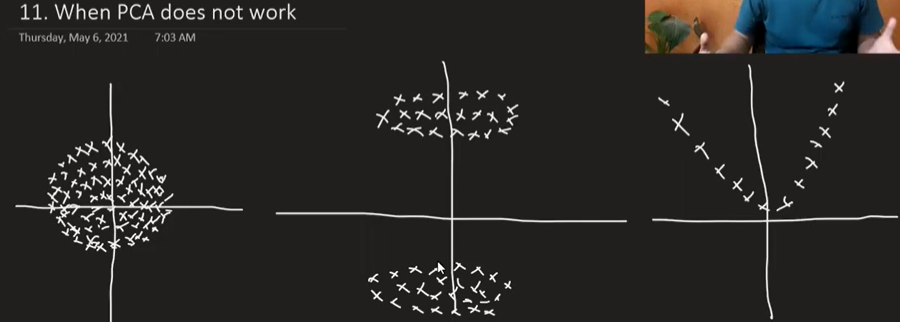

# Conclude